In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as soup
from datetime import datetime

In [76]:
covid_df=pd.read_csv("covid_19_india.csv")
covid_df

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0        1  30/01/20  6:00 PM               Kerala                       1   
1        2  31/01/20  6:00 PM               Kerala                       1   
2        3  01/02/20  6:00 PM               Kerala                       2   
3        4  02/02/20  6:00 PM               Kerala                       3   
4        5  03/02/20  6:00 PM               Kerala                       3   
...    ...       ...      ...                  ...                     ...   
6136  6137  10/09/20  8:00 AM            Telengana                       -   
6137  6138  10/09/20  8:00 AM              Tripura                       -   
6138  6139  10/09/20  8:00 AM          Uttarakhand                       -   
6139  6140  10/09/20  8:00 AM        Uttar Pradesh                       -   
6140  6141  10/09/20  8:00 AM          West Bengal                       -   

     ConfirmedForeignNational   Cured  Deaths  Confirmed  
0                           0       0       0          1  
1                           0       0       0          1  
2                           0       0       0          2  
3                           0       0       0          3  
4                           0       0       0          3  
...                       ...     ...     ...        ...  
6136                        -  117143     927     150176  
6137                        -    9993     173      17252  
6138                        -   18262     372      27211  
6139                        -  216901    4112     285041  
6140                        -  162992    3730     190063  

[6141 rows x 9 columns]

## Web Scrapping


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>India COVID - Coronavirus Statistics - Worldometer</title>
<meta content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch
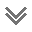

In [77]:
from urllib.request import Request,urlopen
url="https://www.worldometers.info/coronavirus/country/india/"
request=Request(url,headers={'User-Agent':'Mozilla/5.0'})
webpage=urlopen(request)
print(webpage)
page_soup=soup(webpage,'html.parser')
page_soup

In [78]:
table=page_soup.findAll("table",{"id":"main_table_countries_yesterday"})
table

[]

In [79]:
data2=pd.read_csv("Covid vaccines and Cases Dataset Statewise (states  UTs).csv")
data2

State Name  TOTAL CONFIRMED  \
0                         Andaman And Nicobar             7572   
1                               Andra Pradesh          2021325   
2                           Arunachal Pradesh            53338   
3                                       Assam           591980   
4                                       Bihar           725753   
5                                  Chandigarh            65121   
6                                 Chattisgarh          1004635   
7   Dadra and Nangal Haveli and Daman and Diu            10665   
8                                       Delhi          1437959   
9                                         Goa           174419   
10                                    Gujarat           825490   
11                                   Haryana            770557   
12                           Himachal Pradesh           214504   
13                          Jammu and Kashmir           325940   
14                                  Jharkhand           347957   
15                                  Karnataka          2955164   
16                                     Kerala          4201838   
17                                     Ladakh            20583   
18                                Lakshadweep            10348   
19                                Maharashtra          6486174   
20                                    Manipur           115399   
21                                  Meghalaya            77021   
22                                    Mizoram            64228   
23                             Madhya Pradesh           792259   
24                                   Nagaland            30356   
25                                     Odisha          1011558   
26                                 Puducherry           124152   
27                                     Punjab           600813   
28                                  Rajasthan           954129   
29                                     Sikkim            30242   
30                                 Tamil Nadu          2622678   
31                                  Telangana           659543   
32                                    Tripura            83305   
33                              Uttar Pradesh          1709445   
34                                Uttarakhand           343100   
35                                West Bengal          1552071   

    CURED/ DISCHARGED/ MIGRATED   DEATH  Total Vaccine Doses  First Dose  \
0                          7437     129               370432      262193   
1                       1992256   13911             31299846    22370089   
2                         52383     264               991138      732281   
3                        579935    5699             18512199    15168976   
4                        716033    9655             39540878    32919022   
5                         64267     814              1156172      827462   
6                        990711   13556             14532424    11062785   
7                         10659       4               780836      621727   
8                       1412526   25082             14104314    10043337   
9                        170311    3208              1626480     1176591   
10                       815262   10082             49148580    36390999   
11                       760243    9683             17119132    12727755   
12                       209260    3611              7359684     5543504   
13                       320208    4410              8395719     6451281   
14                       342692    5133             13871486    11028928   
15                      2900228   37409             45000560    33749856   
16                      3937996   21496             29636101    21608979   
17                        20319     207               306242      195221   
18                        10285      51                79074       52921   
19                      6294767  137774             48632050    39739421

In [80]:
import json
india_states=json.load(open('states_india.geojson','r'))
india_states

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[78.34088, 19.883615],
       [78.351327, 19.88184],
       [78.370422, 19.883346],
       [78.379149, 19.879733],
       [78.388848, 19.879703],
       [78.389673, 19.874372],
       [78.388883, 19.864121],
       [78.390691, 19.856213],
       [78.390645, 19.853215],
       [78.39395, 19.846705],
       [78.402384, 19.836943],
       [78.413779, 19.830435],
       [78.433447, 19.8237],
       [78.449385, 19.819844],
       [78.469482, 19.816847],
       [78.481036, 19.817011],
       [78.489156, 19.807863],
       [78.494337, 19.799196],
       [78.498808, 19.793852],
       [78.508559, 19.793125],
       [78.514515, 19.801887],
       [78.517292, 19.814976],
       [78.52413, 19.820588],
       [78.531195, 19.822351],
       [78.562889, 19.81634],
       [78.57869, 19.814543],
       [78.590001, 19.81245],
       [78.596781, 19.816171],
       [78.600308, 19.

In [81]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       6141 non-null   int64 
 1   Date                      6141 non-null   object
 2   Time                      6141 non-null   object
 3   State/UnionTerritory      6141 non-null   object
 4   ConfirmedIndianNational   6141 non-null   object
 5   ConfirmedForeignNational  6141 non-null   object
 6   Cured                     6141 non-null   int64 
 7   Deaths                    6141 non-null   int64 
 8   Confirmed                 6141 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 431.9+ KB


In [82]:
covid_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [83]:
covid_df.describe()

Sno          Cured        Deaths      Confirmed
count  6141.000000    6141.000000   6141.000000    6141.000000
mean   3071.000000   19039.584758    565.217391   27212.799870
std    1772.898333   58401.134331   2128.193199   79682.921777
min       1.000000       0.000000      0.000000       0.000000
25%    1536.000000      22.000000      0.000000      87.000000
50%    3071.000000     735.000000     11.000000    1680.000000
75%    4606.000000    8096.000000    216.000000   13556.000000
max    6141.000000  686462.000000  27787.000000  967349.000000

In [84]:
covid_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [85]:
vaccine_df=pd.read_csv("Covid vaccines and Cases Dataset Statewise (states  UTs).csv")
vaccine_df

State Name  TOTAL CONFIRMED  \
0                         Andaman And Nicobar             7572   
1                               Andra Pradesh          2021325   
2                           Arunachal Pradesh            53338   
3                                       Assam           591980   
4                                       Bihar           725753   
5                                  Chandigarh            65121   
6                                 Chattisgarh          1004635   
7   Dadra and Nangal Haveli and Daman and Diu            10665   
8                                       Delhi          1437959   
9                                         Goa           174419   
10                                    Gujarat           825490   
11                                   Haryana            770557   
12                           Himachal Pradesh           214504   
13                          Jammu and Kashmir           325940   
14                                  Jharkhand           347957   
15                                  Karnataka          2955164   
16                                     Kerala          4201838   
17                                     Ladakh            20583   
18                                Lakshadweep            10348   
19                                Maharashtra          6486174   
20                                    Manipur           115399   
21                                  Meghalaya            77021   
22                                    Mizoram            64228   
23                             Madhya Pradesh           792259   
24                                   Nagaland            30356   
25                                     Odisha          1011558   
26                                 Puducherry           124152   
27                                     Punjab           600813   
28                                  Rajasthan           954129   
29                                     Sikkim            30242   
30                                 Tamil Nadu          2622678   
31                                  Telangana           659543   
32                                    Tripura            83305   
33                              Uttar Pradesh          1709445   
34                                Uttarakhand           343100   
35                                West Bengal          1552071   

    CURED/ DISCHARGED/ MIGRATED   DEATH  Total Vaccine Doses  First Dose  \
0                          7437     129               370432      262193   
1                       1992256   13911             31299846    22370089   
2                         52383     264               991138      732281   
3                        579935    5699             18512199    15168976   
4                        716033    9655             39540878    32919022   
5                         64267     814              1156172      827462   
6                        990711   13556             14532424    11062785   
7                         10659       4               780836      621727   
8                       1412526   25082             14104314    10043337   
9                        170311    3208              1626480     1176591   
10                       815262   10082             49148580    36390999   
11                       760243    9683             17119132    12727755   
12                       209260    3611              7359684     5543504   
13                       320208    4410              8395719     6451281   
14                       342692    5133             13871486    11028928   
15                      2900228   37409             45000560    33749856   
16                      3937996   21496             29636101    21608979   
17                        20319     207               306242      195221   
18                        10285      51                79074       52921   
19                      6294767  137774             48632050    39739421

In [86]:
vaccine_df.isnull().sum()
vaccine_df.info()
vaccine_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   36 non-null     object
 1   TOTAL CONFIRMED              36 non-null     int64 
 2   CURED/ DISCHARGED/ MIGRATED  36 non-null     int64 
 3   DEATH                        36 non-null     int64 
 4   Total Vaccine Doses          36 non-null     int64 
 5   First Dose                   36 non-null     int64 
 6   Second Dose                  36 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.1+ KB


TOTAL CONFIRMED  CURED/ DISCHARGED/ MIGRATED          DEATH  \
count     3.600000e+01                 3.600000e+01      36.000000   
mean      9.172672e+05                 8.939443e+05   12243.111111   
std       1.347251e+06                 1.301771e+06   23628.285076   
min       7.572000e+03                 7.437000e+03       4.000000   
25%       7.404600e+04                 7.116025e+04     811.250000   
50%       4.699685e+05                 4.613135e+05    5416.000000   
75%       1.006366e+06                 9.922990e+05   13644.750000   
max       6.486174e+06                 6.294767e+06  137774.000000   

       Total Vaccine Doses    First Dose   Second Dose  
count         3.600000e+01  3.600000e+01  3.600000e+01  
mean          1.900234e+07  2.240224e+07  4.114012e+06  
std           2.077686e+07  5.205050e+07  4.571462e+06  
min           7.907400e+04  5.292100e+04  2.615300e+04  
25%           1.114914e+06  8.036668e+05  3.054305e+05  
50%           1.398790e+07  1.053613e+07  2.502062e+06  
75%           3.224975e+07  2.379543e+07  6.723400e+06  
max           7.753413e+07  3.113439e+08  1.726351e+07

## Active Cases

In [87]:
covid_df['Active_Cases']=covid_df['Confirmed']-(covid_df['Deaths']+covid_df['Cured'])
covid_df.tail()
# covid_df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Time'],inplace=True,axis=1)
# covid_df.drop(['Sno'],inplace=True,axis=1)
# covid_df

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
6136  6137  10/09/20  8:00 AM            Telengana                       -   
6137  6138  10/09/20  8:00 AM              Tripura                       -   
6138  6139  10/09/20  8:00 AM          Uttarakhand                       -   
6139  6140  10/09/20  8:00 AM        Uttar Pradesh                       -   
6140  6141  10/09/20  8:00 AM          West Bengal                       -   

     ConfirmedForeignNational   Cured  Deaths  Confirmed  Active_Cases  
6136                        -  117143     927     150176         32106  
6137                        -    9993     173      17252          7086  
6138                        -   18262     372      27211          8577  
6139                        -  216901    4112     285041         64028  
6140                        -  162992    3730     190063         23341

In [88]:
statewise=pd.pivot_table(covid_df,values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc=max)
statewise

Confirmed   Cured  Deaths
State/UnionTerritory                                               
Andaman and Nicobar Islands                    3426    3078      51
Andhra Pradesh                               527512  425607    4634
Arunachal Pradesh                              5545    3906       9
Assam                                        133066  103504     396
Bihar                                        152192  135791     775
Cases being reassigned to states               9265       0       0
Chandigarh                                     6704    4140      80
Chhattisgarh                                  52932   24414     477
Dadar Nagar Haveli                               26       2       0
Dadra and Nagar Haveli and Daman and Diu       2643    2346       2
Daman & Diu                                       2       0       0
Delhi                                        201174  172763    4638
Goa                                           22251   17156     262
Gujarat                                      108133   88688    3149
Haryana                                       83353   65143     882
Himachal Pradesh                               8147    5597      63
Jammu and Kashmir                             47542   33871     832
Jharkhand                                     56897   40659     512
Karnataka                                    421730  315433    6808
Kerala                                        95917   70917     384
Ladakh                                         3142    2329      35
Madhya Pradesh                                79192   59850    1640
Maharashtra                                  967349  686462   27787
Manipur                                        7362    5548      40
Meghalaya                                      3197    1823      19
Mizoram                                        1192     750       0
Nagaland                                       4375    3787      10
Odisha                                       135130  105295     580
Puducherry                                    18084   12967     347
Punjab                                        69684   50558    2061
Rajasthan                                     95736   79450    1178
Sikkim                                         1989    1429       7
Tamil Nadu                                   480524  423231    8090
Telangana                                     54059   41332     463
Telangana***                                  52466   40334     455
Telengana                                    150176  117143     927
Telengana***                                  57142   42909     480
Tripura                                       17252    9993     173
Unassigned                                       77       0       0
Uttar Pradesh                                285041  216901    4112
Uttarakhand                                   27211   18262     372
West Bengal                                  190063  162992    3730

In [89]:
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]
statewise

Confirmed   Cured  Deaths  \
State/UnionTerritory                                                  
Andaman and Nicobar Islands                    3426    3078      51   
Andhra Pradesh                               527512  425607    4634   
Arunachal Pradesh                              5545    3906       9   
Assam                                        133066  103504     396   
Bihar                                        152192  135791     775   
Cases being reassigned to states               9265       0       0   
Chandigarh                                     6704    4140      80   
Chhattisgarh                                  52932   24414     477   
Dadar Nagar Haveli                               26       2       0   
Dadra and Nagar Haveli and Daman and Diu       2643    2346       2   
Daman & Diu                                       2       0       0   
Delhi                                        201174  172763    4638   
Goa                                           22251   17156     262   
Gujarat                                      108133   88688    3149   
Haryana                                       83353   65143     882   
Himachal Pradesh                               8147    5597      63   
Jammu and Kashmir                             47542   33871     832   
Jharkhand                                     56897   40659     512   
Karnataka                                    421730  315433    6808   
Kerala                                        95917   70917     384   
Ladakh                                         3142    2329      35   
Madhya Pradesh                                79192   59850    1640   
Maharashtra                                  967349  686462   27787   
Manipur                                        7362    5548      40   
Meghalaya                                      3197    1823      19   
Mizoram                                        1192     750       0   
Nagaland                                       4375    3787      10   
Odisha                                       135130  105295     580   
Puducherry                                    18084   12967     347   
Punjab                                        69684   50558    2061   
Rajasthan                                     95736   79450    1178   
Sikkim                                         1989    1429       7   
Tamil Nadu                                   480524  423231    8090   
Telangana                                     54059   41332     463   
Telangana***                                  52466   40334     455   
Telengana                                    150176  117143     927   
Telengana***                                  57142   42909     480   
Tripura                                       17252    9993     173   
Unassigned                                       77       0       0   
Uttar Pradesh                                285041  216901    4112   
Uttarakhand                                   27211   18262     372   
West Bengal                                  190063  162992    3730   

                                          Recovery Rate  
State/UnionTerritory                                     
Andaman and Nicobar Islands                   89.842382  
Andhra Pradesh                                80.681956  
Arunachal Pradesh                             70.441839  
Assam                                         77.783957  
Bihar                                         89.223481  
Cases being reassigned to states               0.000000  
Chandigarh                                    61.754177  
Chhattisgarh                                  46.123328  
Dadar Nagar Haveli                             7.692308  
Dadra and Nagar Haveli and Daman and Diu      88.762770  
Daman & Diu                                    0.000000  
Delhi                                         85.877400  
Goa                                           77.102153  
Gujarat                                       8

In [90]:
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]
statewise

Confirmed   Cured  Deaths  \
State/UnionTerritory                                                  
Andaman and Nicobar Islands                    3426    3078      51   
Andhra Pradesh                               527512  425607    4634   
Arunachal Pradesh                              5545    3906       9   
Assam                                        133066  103504     396   
Bihar                                        152192  135791     775   
Cases being reassigned to states               9265       0       0   
Chandigarh                                     6704    4140      80   
Chhattisgarh                                  52932   24414     477   
Dadar Nagar Haveli                               26       2       0   
Dadra and Nagar Haveli and Daman and Diu       2643    2346       2   
Daman & Diu                                       2       0       0   
Delhi                                        201174  172763    4638   
Goa                                           22251   17156     262   
Gujarat                                      108133   88688    3149   
Haryana                                       83353   65143     882   
Himachal Pradesh                               8147    5597      63   
Jammu and Kashmir                             47542   33871     832   
Jharkhand                                     56897   40659     512   
Karnataka                                    421730  315433    6808   
Kerala                                        95917   70917     384   
Ladakh                                         3142    2329      35   
Madhya Pradesh                                79192   59850    1640   
Maharashtra                                  967349  686462   27787   
Manipur                                        7362    5548      40   
Meghalaya                                      3197    1823      19   
Mizoram                                        1192     750       0   
Nagaland                                       4375    3787      10   
Odisha                                       135130  105295     580   
Puducherry                                    18084   12967     347   
Punjab                                        69684   50558    2061   
Rajasthan                                     95736   79450    1178   
Sikkim                                         1989    1429       7   
Tamil Nadu                                   480524  423231    8090   
Telangana                                     54059   41332     463   
Telangana***                                  52466   40334     455   
Telengana                                    150176  117143     927   
Telengana***                                  57142   42909     480   
Tripura                                       17252    9993     173   
Unassigned                                       77       0       0   
Uttar Pradesh                                285041  216901    4112   
Uttarakhand                                   27211   18262     372   
West Bengal                                  190063  162992    3730   

                                          Recovery Rate  Mortality Rate  
State/UnionTerritory                                                     
Andaman and Nicobar Islands                   89.842382        1.488616  
Andhra Pradesh                                80.681956        0.878463  
Arunachal Pradesh                             70.441839        0.162308  
Assam                                         77.783957        0.297597  
Bihar                                         89.223481        0.509225  
Cases being reassigned to states               0.000000        0.000000  
Chandigarh                                    61.754177        1.193317  
Chhattisgarh                                  46.123328        0.901156  
Dadar Nagar Haveli                             7.692308        0.000000  
Dadra and Nagar Haveli and Daman and Diu      88.762770        0.075672  
Daman & Diu                  

In [91]:
statewise=statewise.sort_values(by="Confirmed",ascending=False )

In [93]:
statewise

Confirmed   Cured  Deaths  \
State/UnionTerritory                                                  
Maharashtra                                  967349  686462   27787   
Andhra Pradesh                               527512  425607    4634   
Tamil Nadu                                   480524  423231    8090   
Karnataka                                    421730  315433    6808   
Uttar Pradesh                                285041  216901    4112   
Delhi                                        201174  172763    4638   
West Bengal                                  190063  162992    3730   
Bihar                                        152192  135791     775   
Telengana                                    150176  117143     927   
Odisha                                       135130  105295     580   
Assam                                        133066  103504     396   
Gujarat                                      108133   88688    3149   
Kerala                                        95917   70917     384   
Rajasthan                                     95736   79450    1178   
Haryana                                       83353   65143     882   
Madhya Pradesh                                79192   59850    1640   
Punjab                                        69684   50558    2061   
Telengana***                                  57142   42909     480   
Jharkhand                                     56897   40659     512   
Telangana                                     54059   41332     463   
Chhattisgarh                                  52932   24414     477   
Telangana***                                  52466   40334     455   
Jammu and Kashmir                             47542   33871     832   
Uttarakhand                                   27211   18262     372   
Goa                                           22251   17156     262   
Puducherry                                    18084   12967     347   
Tripura                                       17252    9993     173   
Cases being reassigned to states               9265       0       0   
Himachal Pradesh                               8147    5597      63   
Manipur                                        7362    5548      40   
Chandigarh                                     6704    4140      80   
Arunachal Pradesh                              5545    3906       9   
Nagaland                                       4375    3787      10   
Andaman and Nicobar Islands                    3426    3078      51   
Meghalaya                                      3197    1823      19   
Ladakh                                         3142    2329      35   
Dadra and Nagar Haveli and Daman and Diu       2643    2346       2   
Sikkim                                         1989    1429       7   
Mizoram                                        1192     750       0   
Unassigned                                       77       0       0   
Dadar Nagar Haveli                               26       2       0   
Daman & Diu                                       2       0       0   

                                          Recovery Rate  Mortality Rate  
State/UnionTerritory                                                     
Maharashtra                                   70.963220        2.872490  
Andhra Pradesh                                80.681956        0.878463  
Tamil Nadu                                    88.076974        1.683579  
Karnataka                                     74.795011        1.614303  
Uttar Pradesh                                 76.094667        1.442599  
Delhi                                         85.877400        2.305467  
West Bengal                                   85.756828        1.962507  
Bihar                                         89.223481        0.509225  
Telengana                                     78.003809        0.617276  
Odisha                                        77.921261        0.429216  
Assam                        

In [95]:
statewise.style.background_gradient(cmap="cubehelix")

## Top 10 active cases states

In [100]:
top_10_active_cases=covid_df.groupby(by='State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by=['Active_Cases'],ascending=False).reset_index()
top_10_active_cases

State/UnionTerritory  Active_Cases      Date
0                                Maharashtra        253100  31/08/20
1                             Andhra Pradesh        103521  31/08/20
2                                  Karnataka         99636  31/08/20
3                              Uttar Pradesh         64028  31/08/20
4                                 Tamil Nadu         57968  31/08/20
5                                  Telengana         32994  31/08/20
6                                      Bihar         32636  31/08/20
7                                     Odisha         29255  31/08/20
8                                      Assam         29206  31/08/20
9                                      Delhi         28329  31/08/20
10                               West Bengal         28069  31/08/20
11                              Chhattisgarh         28041  31/08/20
12                                    Kerala         24616  31/08/20
13                            Madhya Pradesh         17702  31/08/20
14                                   Haryana         17328  31/08/20
15                                    Punjab         17065  31/08/20
16                                   Gujarat         16482  31/08/20
17                                 Jharkhand         15726  31/08/20
18                                 Rajasthan         15108  31/08/20
19                              Telengana***         13753  29/07/20
20                                 Telangana         13388  30/06/20
21                         Jammu and Kashmir         12839  31/08/20
22                              Telangana***         11677  26/07/20
23          Cases being reassigned to states          9265  31/05/20
24                               Uttarakhand          8577  31/08/20
25                                   Tripura          7086  31/08/20
26                                Puducherry          5210  31/08/20
27                                       Goa          4945  31/08/20
28                          Himachal Pradesh          2487  31/08/20
29                                Chandigarh          2484  31/08/20
30                                  Nagaland          2116  31/08/20
31                                   Manipur          1973  31/08/20
32                         Arunachal Pradesh          1670  31/08/20
33                                 Meghalaya          1457  31/08/20
34               Andaman and Nicobar Islands          1154  31/08/20
35                                    Ladakh           856  31/08/20
36                                    Sikkim           553  31/08/20
37                                   Mizoram           503  31/08/20
38  Dadra and Nagar Haveli and Daman and Diu           464  31/08/20
39                                Unassigned            77  31/03/20
40                        Dadar Nagar Haveli            24  31/05/20
41                               Daman & Diu             2  11/06/20

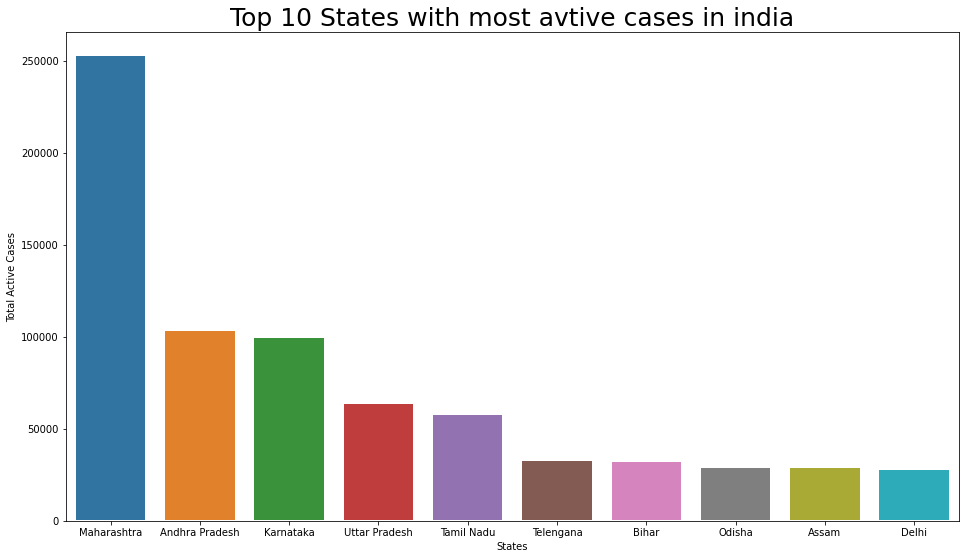

In [108]:
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 States with most avtive cases in india",size=25)
ax=sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_Cases",x='State/UnionTerritory',linewidth=2,edgecolor='white')
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()